# Exclusive Chopin Midi

In [1]:
import requests
import re
from bs4 import BeautifulSoup
import wget
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Scraping from Classical Piano Midi Page

In [2]:
# function to download midi files after retrieving composer links
def download_links_from_composer_links(composer_str):
#     request composer's page based on link retrieved in link.get('href')
    html_page = requests.get(f"http://www.piano-midi.de/{composer_str}")
#     transform with bs4 for html read out 
    soup = BeautifulSoup(html_page.content, 'html.parser')
#     search html for midi file link in each table and download
    for table in soup.findAll('table', 'midi'):
        for link in table.findAll('a'):
#           print each file found per composer
            print(link.get('href')[-3:])
#           download only the midi files
            if link.get('href')[-3:] == 'mid':
                wget.download('http://www.piano-midi.de/{}'.format(link.get('href')))

In [20]:
# set variable to Classical Piano Midi webpage
html_page = requests.get("http://www.piano-midi.de/midi_files.htm")
# from webpage, retrieve table of composers
composers_soup = BeautifulSoup(html_page.content, 'html.parser')
composer_table = composers_soup.find('table', 'midi')
# loop through table of composers and retrieve chopin's link to feed to dl function
for link in composer_table.findAll('a', attrs={'href': 'chopin.htm'}):
    print(link.get('href'))
    # use function to pass composer links
    download_links_from_composer_links(link.get('href'))

chopin.htm
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
wmv
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg


## Scraping from Midi World

In [4]:
# function to parse through Midiworld.com and pull Chopin's page
def find_chopin(str):
    html_pg = requests.get(str)
    composer_pg = BeautifulSoup(html_pg.content, 'html.parser')
    find_it = composer_pg.findAll('a', attrs={'href': 'chopin.htm'})
    for i in find_it:
        compr = i.get('href')
    base = 'https://www.midiworld.com/'
    end = compr
    chopin = base + end
    return chopin

In [5]:
find_chopin('https://www.midiworld.com/composers.htm')

'https://www.midiworld.com/chopin.htm'

In [6]:
# running 'find_chopin' now that his url is located
chopin_html = requests.get(find_chopin('https://www.midiworld.com/composers.htm'))
chopin_pg = BeautifulSoup(chopin_html.content, 'html.parser')
# pulling all links on Chopin's page
chopin_links = chopin_pg.findAll('a', attrs={'href': re.compile("^https://")})
# pulling all Chopin midi files 
for link in chopin_links:
    if link.get('href')[-3:] == 'mid':
        print(link.get('href'))
        wget.download(link.get('href'))

https://www.midiworld.com/midis/other/chopin/ballade1.mid
https://www.midiworld.com/midis/other/chopin/ballade2.mid
https://www.midiworld.com/midis/other/chopin/ballade3.mid
https://www.midiworld.com/midis/other/chopin/ballade4.mid
https://www.midiworld.com/midis/other/chopin/chet1001.mid
https://www.midiworld.com/midis/other/chopin/chet1002.mid
https://www.midiworld.com/midis/other/chopin/chet1003.mid
https://www.midiworld.com/midis/other/chopin/chet1004.mid
https://www.midiworld.com/midis/other/chopin/chet1005.mid
https://www.midiworld.com/midis/other/chopin/chet1006.mid
https://www.midiworld.com/midis/other/chopin/chet1007.mid
https://www.midiworld.com/midis/other/chopin/chet1008.mid
https://www.midiworld.com/midis/other/chopin/chet1009.mid
https://www.midiworld.com/midis/other/chopin/chet1010.mid
https://www.midiworld.com/midis/other/chopin/chet1011.mid
https://www.midiworld.com/midis/other/chopin/chet1012.mid
https://www.midiworld.com/midis/other/chopin/chet2501.mid
https://www.mi

## Putting Midi_World Midi into DataFrames

In [7]:
# scraping titile of peices from Chopin midilinks
chopin_titles = []
for link in chopin_links:
    href = link.get('href')
    chopin_titles.append(link.string)

In [8]:
del chopin_titles[0]

In [9]:
df_chopin_titles = pd.DataFrame(chopin_titles)

In [10]:
df_chopin_titles = df_chopin_titles.rename(columns = {0: 'Title'})

In [11]:
df_chopin_titles

,Title
0,Op. 23. in Gmin
1,Op. 38. in F
2,Op. 47. in Ab
3,Op. 52. in Fmin
4,Op. 10. No. 1. in C
...,...
96,Op.18. in Eb
97,Op.64. No. 1. in Db
98,Op.64. No. 2. in C#min
99,Op. 70. No. 2. in Ab


In [12]:
chopin_track_list = []
for link in chopin_links:
    if link.get('href')[-3:] == 'mid':
        chopin_track_list.append(link.get('href'))
chopin_track_list

['https://www.midiworld.com/midis/other/chopin/ballade1.mid',
 'https://www.midiworld.com/midis/other/chopin/ballade2.mid',
 'https://www.midiworld.com/midis/other/chopin/ballade3.mid',
 'https://www.midiworld.com/midis/other/chopin/ballade4.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1001.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1002.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1003.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1004.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1005.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1006.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1007.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1008.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1009.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1010.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1011.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1012.mid',
 'https:

In [13]:
df_chopin_track_list = pd.DataFrame(chopin_track_list)

In [16]:
df_chopin_track_list = df_chopin_track_list.rename(columns = {0: 'midi_link'})

In [17]:
df_chopin_track_list

,midi_link
0,https://www.midiworld.com/midis/other/chopin/b...
1,https://www.midiworld.com/midis/other/chopin/b...
2,https://www.midiworld.com/midis/other/chopin/b...
3,https://www.midiworld.com/midis/other/chopin/b...
4,https://www.midiworld.com/midis/other/chopin/c...
...,...
96,https://www.midiworld.com/midis/other/chopin/c...
97,https://www.midiworld.com/midis/other/chopin/c...
98,https://www.midiworld.com/midis/other/chopin/c...
99,https://www.midiworld.com/midis/other/chopin/c...


In [18]:
df_chopin_titles['Midi_Link'] = df_chopin_track_list

In [109]:
df_chopin_titles['Midi_Link'][0]

'https://www.midiworld.com/midis/other/chopin/ballade1.mid'

## Paring Files into Sequences
 using Music21

In [2]:
from music21 import converter, instrument, note, chord, stream, key, roman, corpus
import glob
import pickle
import numpy as np
import pretty_midi
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt

%matplotlib inline

An example of how Music21 can parse midi_data

In [3]:
# retireving each midi data point in a list

file = "Chopin_Subset/etudes/chet1001.mid"
midi = converter.parse(file)
notes_to_parse = midi.flat.notes
for element in notes_to_parse[:10]:
  print(element, element.offset)

<music21.note.Note C> 4.0
<music21.note.Note C> 4.0
<music21.note.Note C> 4.25
<music21.note.Note G> 4.5
<music21.note.Note C> 4.75
<music21.note.Note E> 5.0
<music21.note.Note C> 5.25
<music21.note.Note G> 5.5
<music21.note.Note C> 5.75
<music21.note.Note E> 6.0


## Visualizing

In [4]:
fs=100
midi_pretty_format = pretty_midi.PrettyMIDI("Chopin_Subset/etudes/chet1001.mid")
piano_midi = midi_pretty_format.instruments[0] # Get the piano channels
piano_roll = piano_midi.get_piano_roll(fs=fs)

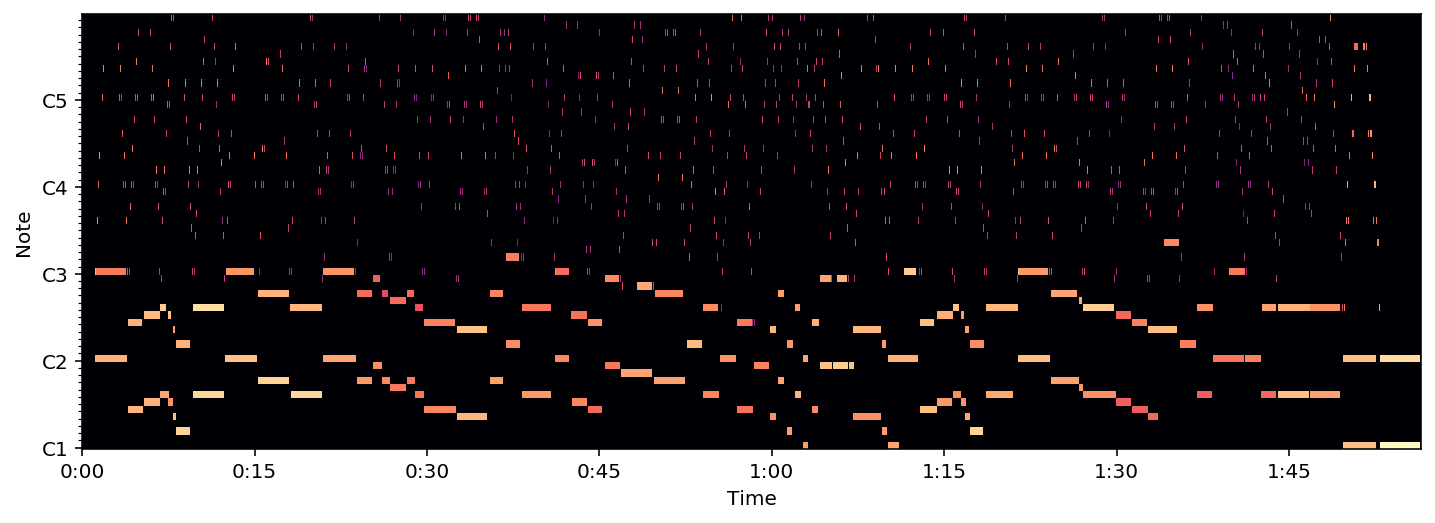

In [5]:
# function to show midi data as data points along a timeline
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(12, 4))
plot_piano_roll(midi_pretty_format, 24, 84)

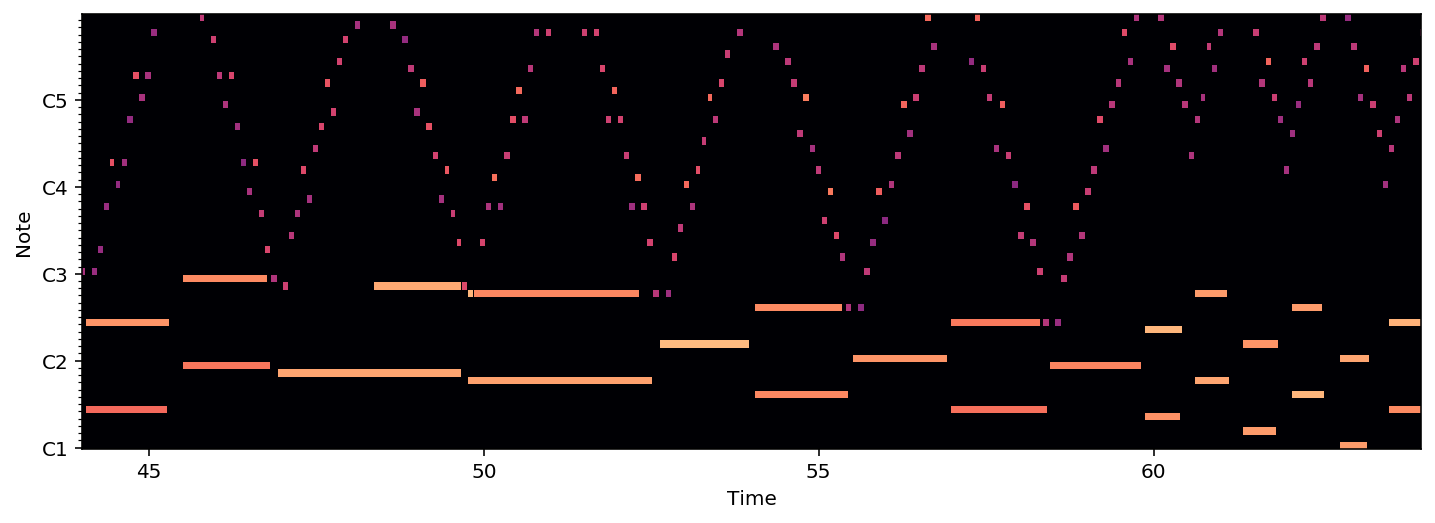

In [6]:
# zooming in to a 20 second frame
plt.figure(figsize=(12, 4))
plot_piano_roll(midi_pretty_format, 24, 84)
ymin, ymax = plt.ylim()
plt.xlim(44,64);

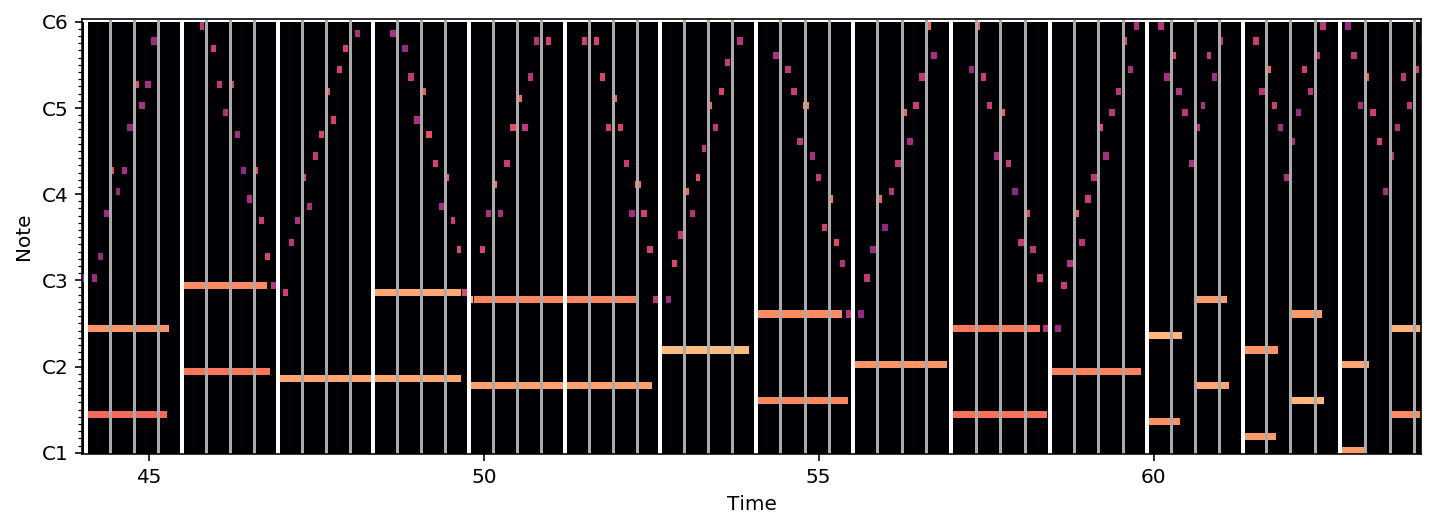

In [7]:
# Get and downbeat times
beats = midi_pretty_format.get_beats()
downbeats = midi_pretty_format.get_downbeats()
# Plot piano roll
plt.figure(figsize=(12, 4))
plot_piano_roll(midi_pretty_format, 24, 84)
ymin, ymax = plt.ylim()
# Plot beats as grey lines, downbeats as white lines
mir_eval.display.events(beats, base=ymin, height=ymax, color='#AAAAAA')
mir_eval.display.events(downbeats, base=ymin, height=ymax, color='#FFFFFF', lw=2)
# 20 seconds for clarity
plt.xlim(44, 64);

Text(0, 0.5, 'Proportion')

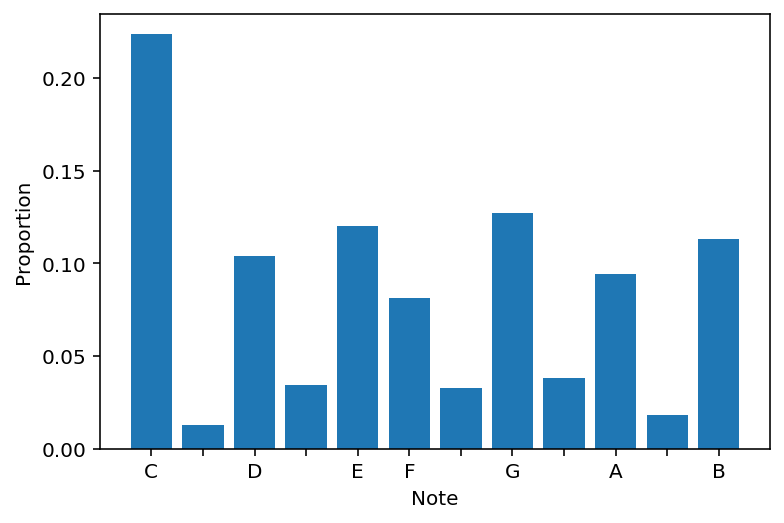

In [8]:
# looking at the peice's pitch set
plt.bar(np.arange(12), midi_pretty_format.get_pitch_class_histogram());
plt.xticks(np.arange(12), ['C', '', 'D', '', 'E', 'F', '', 'G', '', 'A', '', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

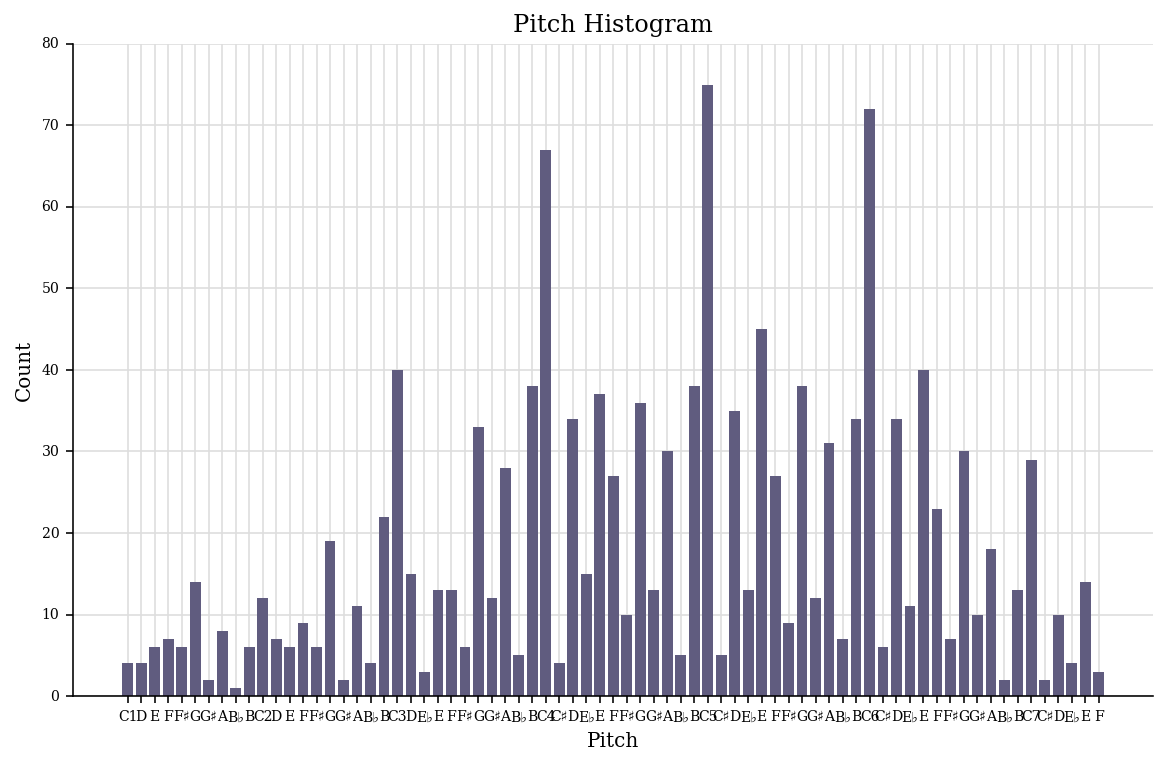

In [11]:
etude.plot('histogram', 'pitch')

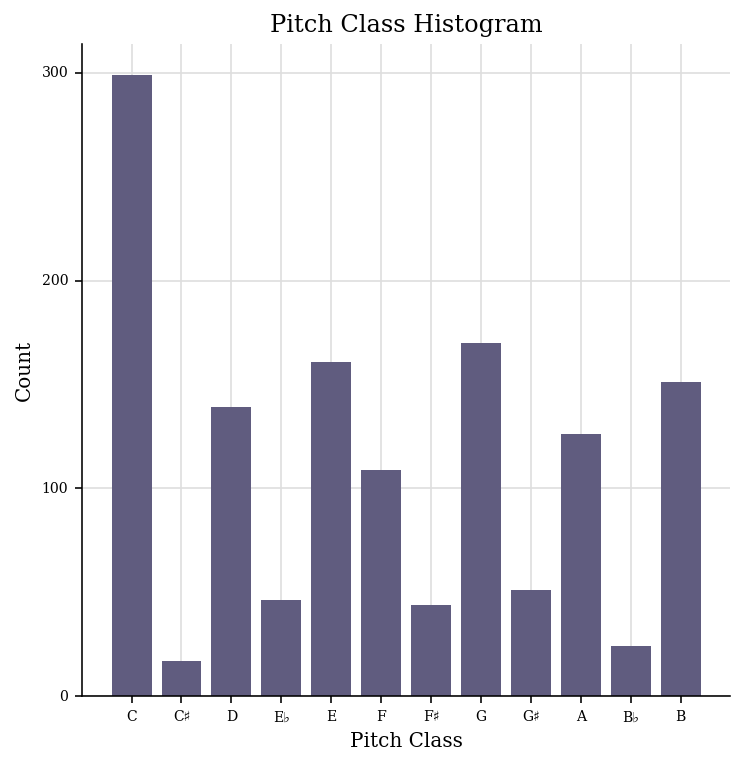

In [12]:
etude.plot('histogram', 'pitchClass')

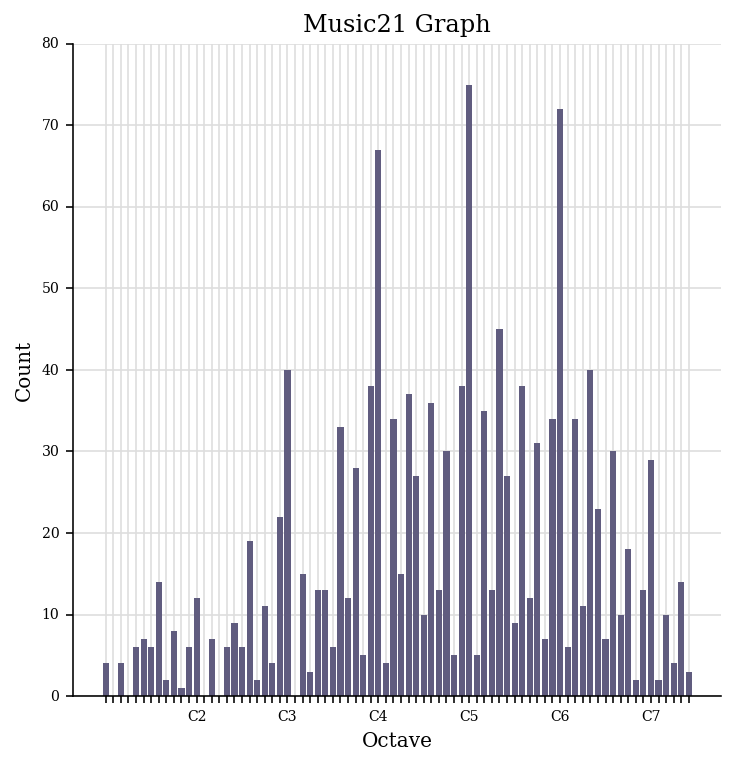

In [13]:
etude.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches')

In [14]:
etude.analyze('key')

<music21.key.Key of C major>

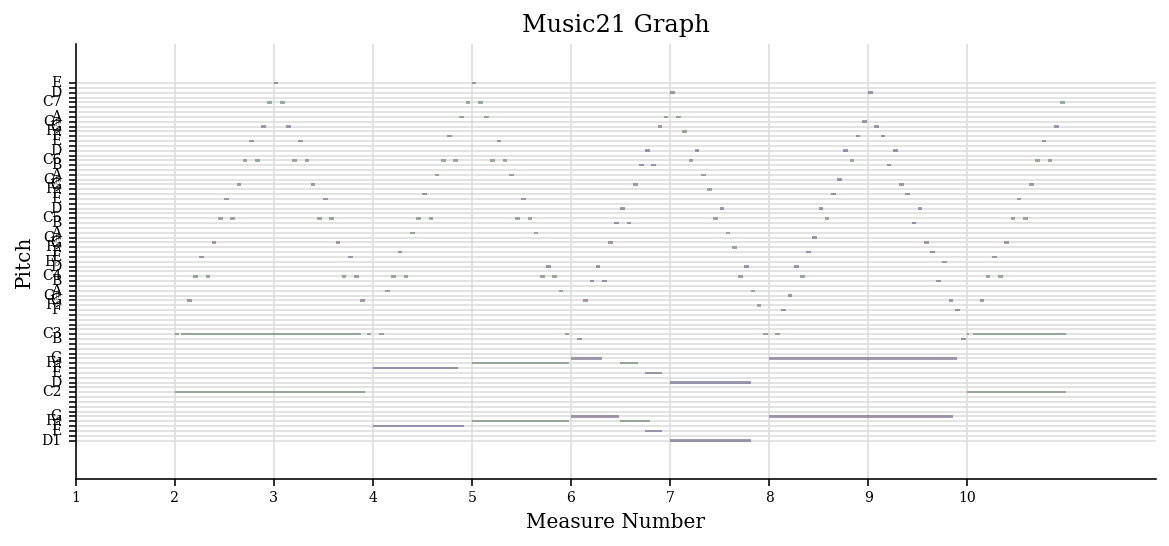

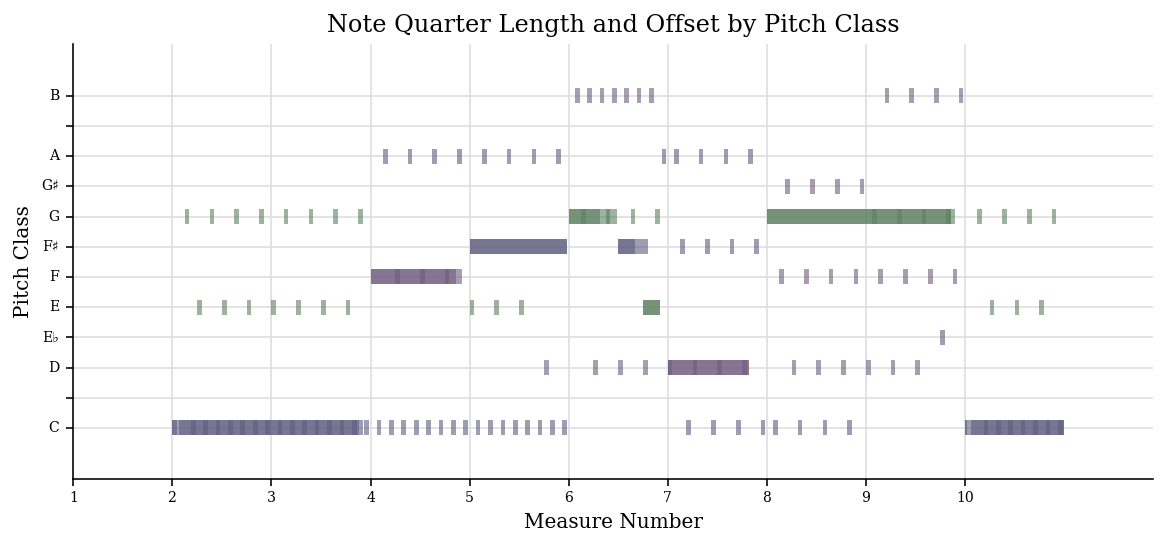

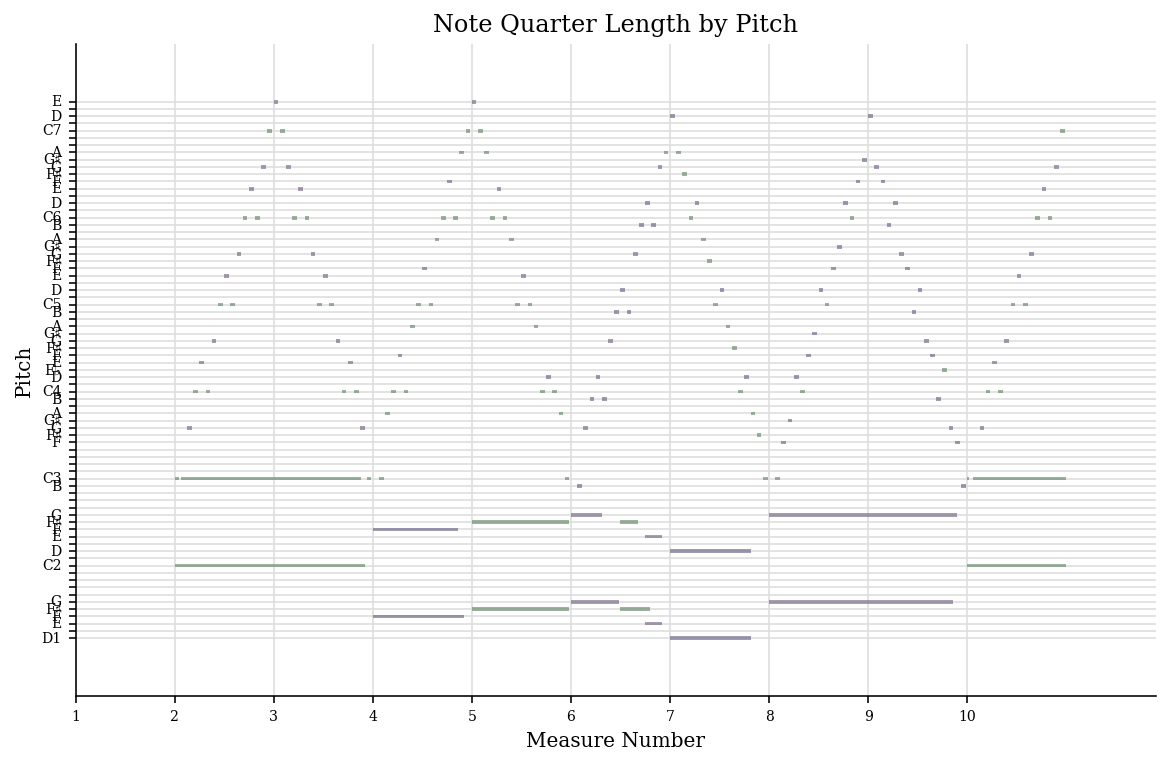

In [10]:
etude = converter.parse("Chopin_Subset/etudes/chet1001.mid")
etude.measures(1,10).plot('horizontalbar')

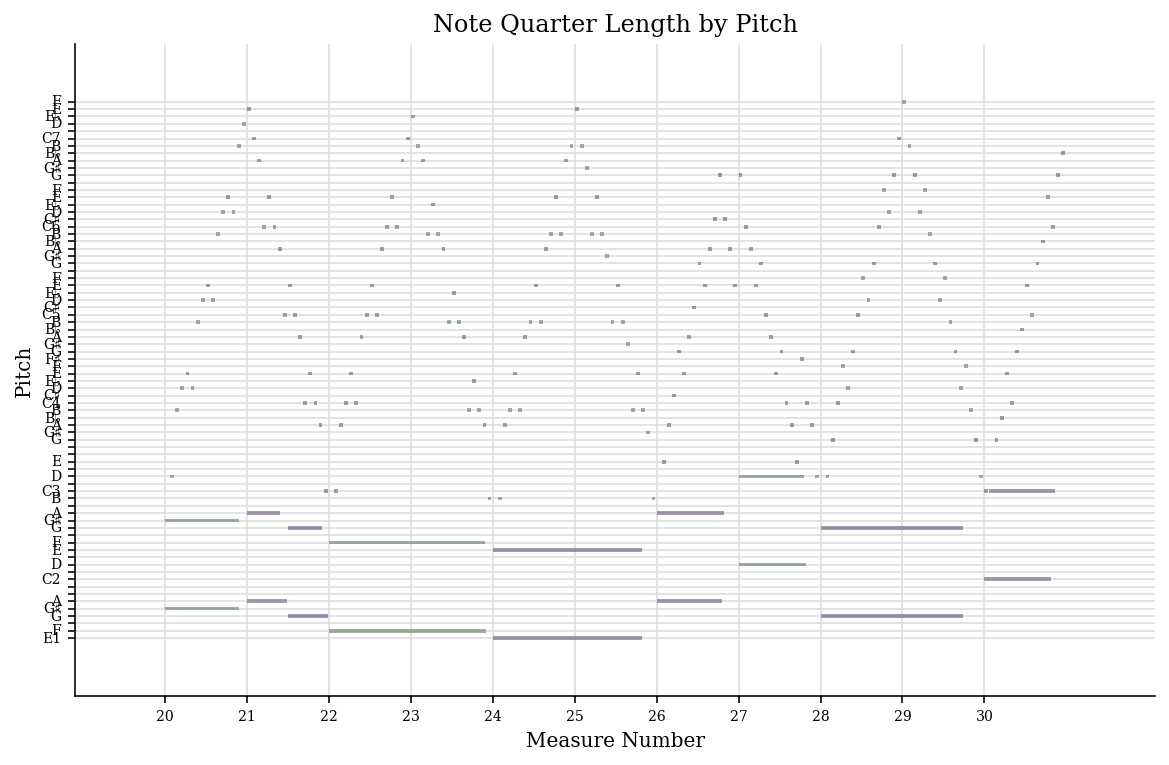

In [15]:
etude.measures(20,30).plot(dpi = 400)

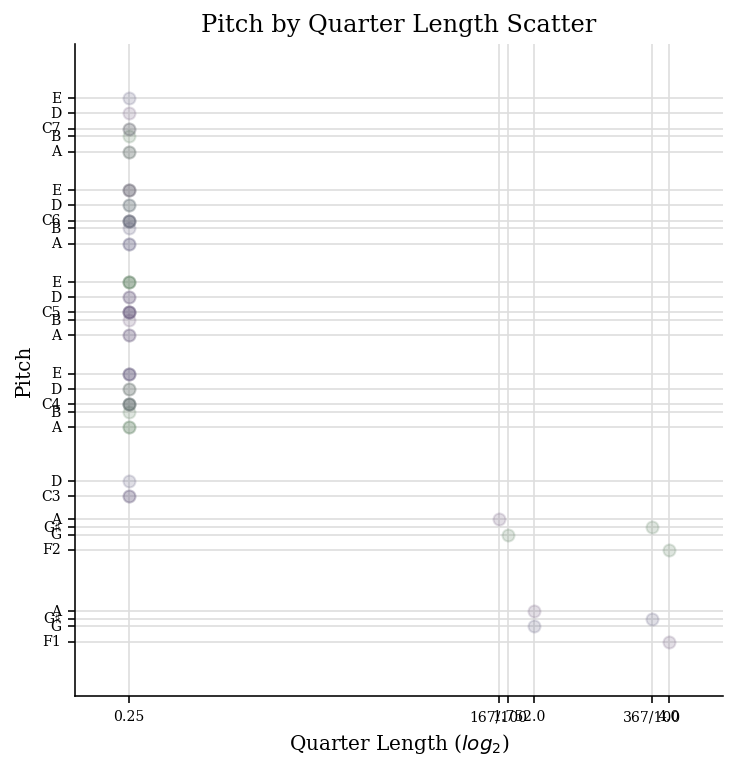

In [16]:
etude.measures(20,22).plot('scatter', 'quarterLength', 'pitch')

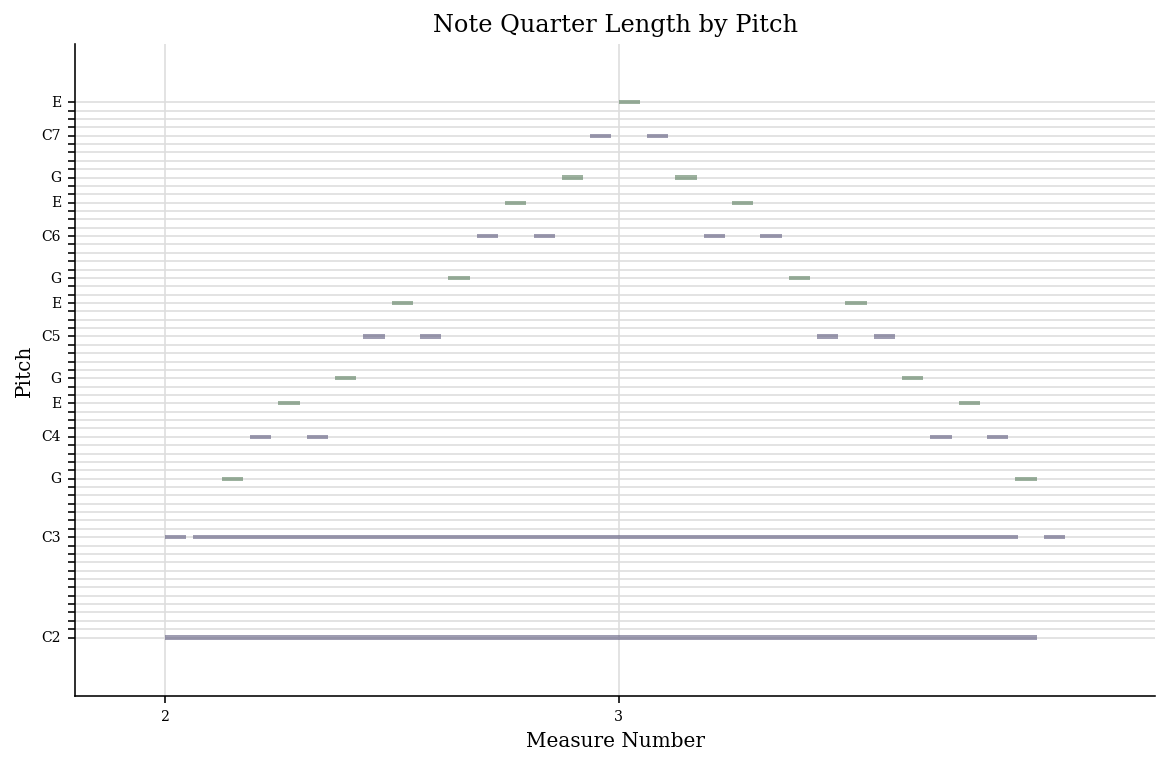

In [17]:
etude.measures(2,3).plot('pianoroll')

Parsing the midi into two categories: 
1. pitch
2. chords

Pitches will be displayed as single letters and a number indicateing pitch and ocatve.
Chords will be displayed as digits with a period between them indicated the pitches in the chord.

We are not considering duration or rhythm. We are focusing on the sequence of the pitches. 

In [18]:
x = []
for i,file in enumerate(glob.glob("Chopin_Subset/etudes/*.mid")):
    print(file)
    x.append(file)

Chopin_Subset/etudes/chet1001.mid
Chopin_Subset/etudes/chet1002.mid
Chopin_Subset/etudes/chet1003.mid
Chopin_Subset/etudes/chet1004.mid
Chopin_Subset/etudes/chet1005.mid
Chopin_Subset/etudes/chet1006.mid
Chopin_Subset/etudes/chet1007.mid
Chopin_Subset/etudes/chet1008.mid
Chopin_Subset/etudes/chet1009.mid
Chopin_Subset/etudes/chet1010.mid
Chopin_Subset/etudes/chet1011.mid
Chopin_Subset/etudes/chet1012.mid
Chopin_Subset/etudes/chet2501.mid
Chopin_Subset/etudes/chet2506.mid
Chopin_Subset/etudes/chet2507.mid
Chopin_Subset/etudes/chet2509.mid
Chopin_Subset/etudes/chet2511.mid
Chopin_Subset/etudes/chet2512.mid


In [19]:
len(x)

18

In [20]:
%time
# create an empty list to hold all instances of note or chord
notes = []
# go through 'midi_files' 
# index midi file and parse through each file
for i,file in enumerate(glob.glob("Chopin_Subset/etudes/*.mid")):
    print(file)
    midi = converter.parse(file)
    print('\r', 'Parsing file ', i, " ")
#   flatten the notes (make sure each file has only one insturment) 
    notes_to_parse = midi.flat.notes
#   sift through whether each element is a pitch  
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch))
#   or if it is a chord (reduce to pitch_set)
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))
        print(element)
# save as file 'notes' in order to call
# with open('notes', 'wb') as filepath:
#     pickle.dump(notes, filepath)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
Chopin_Subset/etudes/chet1001.mid
 Parsing file  0  
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<mu

 Parsing file  1  
<music21.chord.Chord A2 A4 E4 C4>
<music21.note.Note B->
<music21.note.Note B>
<music21.note.Note C>
<music21.chord.Chord A4 E4 E3 C4 C#5>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note E>
<music21.chord.Chord A4 D5 A2 F5>
<music21.note.Note F#>
<music21.note.Note G>
<music21.note.Note G#>
<music21.chord.Chord D5 F5 F3 D4 A3 A5>
<music21.note.Note B->
<music21.note.Note B>
<music21.note.Note C>
<music21.chord.Chord E5 A5 A1 A2 C#6>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note E>
<music21.chord.Chord E3 C6 A5 C4 A3 F6>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note D>
<music21.chord.Chord A5 E5 A3 C4 C#6>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note B>
<music21.note.Note B->
<music21.chord.Chord A5 E5>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note A>
<music21.chord.Chord G#5 E5 B4>
<music21.note.Note E>
<music21.note.Note G>
<music21.not

 Parsing file  2  
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note B>
<music21.chord.Chord E-4 G#3>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note B>
<music21.chord.Chord F#4 E-4>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note E>
<music21.n

<music21.chord.Chord B-2 E3 G5 C#6>
<music21.note.Note C#>
<music21.chord.Chord G4 B-3 E3>
<music21.chord.Chord C5 F#4>
<music21.chord.Chord A3 E-3>
<music21.chord.Chord F5 G#3 D3>
<music21.note.Note B>
<music21.chord.Chord B-4 E5>
<music21.chord.Chord G3 C#3>
<music21.chord.Chord A5 F#3 E-5 C3>
<music21.chord.Chord G#5 F3 D5 B2>
<music21.chord.Chord C#6 E3 B-2>
<music21.chord.Chord G5 B-2>
<music21.chord.Chord F#5 C6 A2 E-3>
<music21.chord.Chord F#4 A3 C5>
<music21.note.Note E->
<music21.chord.Chord D3 G#3>
<music21.chord.Chord F4 B4>
<music21.chord.Chord C#3 G3 B-4 E5>
<music21.chord.Chord A4 F#3 C3>
<music21.chord.Chord E-5 C3>
<music21.chord.Chord B2 F3>
<music21.chord.Chord D5 G#5>
<music21.chord.Chord C#5 G5>
<music21.chord.Chord B-2 E3>
<music21.chord.Chord E-3 A2>
<music21.chord.Chord F#5 C6>
<music21.chord.Chord D3 B5 F5>
<music21.note.Note G#>
<music21.chord.Chord C#3 G2 B-5>
<music21.note.Note E>
<music21.chord.Chord C3 A5 F2 E-6>
<music21.note.Note B>
<music21.chord.Chord F

 Parsing file  3  
<music21.chord.Chord G#5 G#2>
<music21.chord.Chord G#4 G#3 G#2>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note E->
<music21.chord.Chord C#6 C#5>
<music21.chord.Chord C#2 C#3 C#5>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note C#>
<music21.chord.Chord F#4 A4>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note E->
<music21.chord.Chord G#4 E4>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note E>
<music21.chord.Chord F#4 E-4>
<music21.note.Note F#>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note F#>
<music21.chord.Chord C#4 E4>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.chord.Chord F#4 C#4 A3>
<music21.note.Note F#>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.chord.Chord E5 G#3 E4 C#4>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note C#>
<music21

<music21.chord.Chord G#3 E-4 F#4>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.chord.Chord C6 C5>
<music21.chord.Chord C#5 C#6>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note E->
<music21.chord.Chord F#5 F#4>
<music21.chord.Chord G#5 G#4>
<music21.note.Note B>
<music21.note.Note B>
<music21.chord.Chord A5 A4>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note F>
<music21.chord.Chord E-5 E-4>
<music21.chord.Chord F#4 F#3>
<music21.chord.Chord G#4 G#3>
<music21.chord.Chord B3 B4>
<music21.chord.Chord A4 A3>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord D4 D3>
<music21.note.No

 Parsing file  4  
<music21.note.Note F#>
<music21.chord.Chord C#4 B-3 F#4 F#3>
<music21.note.Note B->
<music21.note.Note C#>
<music21.chord.Chord F#4 F#3 B3 E-4>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note F#>
<music21.chord.Chord C#6 C#4>
<music21.chord.Chord F#4 B-3>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.chord.Chord F#3 F#2>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.chord.Chord F#4 E-4 B3 F#5>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note C#>
<music21.chord.Chord F#4 B-3 C#4>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.chord.Chord C#4 C#3 C#2>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.chord.Chord C#5 F4>
<music21.chord.Chord C#4 G#3>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord E-4 G#4 B3

<music21.note.Note C#>
<music21.note.Note B->
<music21.chord.Chord F#3 F#2 B-2>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note B->
<music21.chord.Chord F#2 F#1>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note B->
<music21.chord.Chord F#2 F#1>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord B-3 C#4>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.chord.Chord F#4 E-4>
<music21.note.Note C#>
<music21.note.Note B->
<music21.chord.Chord B-4 F#4>
<music21.no

<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note F>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note F>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note F>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note F>
<music21.note.Note G>
Chopin_Subset/etudes/chet1007.mid
 Parsing file  6  
<music21.note.Note G>
<music21.chord.Chord G4 E4 C3 C2>
<music21.chord.Chord E4 C5>
<music21.chord.Chord G#4 F4>
<music21.chord.Chord F4 D5>
<music21.chord.Chord F4 D4>
<music21.note.Note G#>
<music21.chord.Chord B4 D4>
<music21.chord.Chord D4 B3>
<music21.note.Note G>
<music21.chord.Chord B3 G4>
<music21.note.Note F#>
<music21.chord.Cho

<music21.chord.Chord C4 E3>
<music21.chord.Chord C2 G2>
<music21.chord.Chord C4 E3>
<music21.note.Note E>
<music21.chord.Chord E4 G3>
<music21.note.Note G>
<music21.chord.Chord G4 C4>
<music21.note.Note C>
<music21.chord.Chord C5 E4>
<music21.note.Note E>
<music21.chord.Chord G4 E5>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note G>
<music21.chord.Chord G5 C5>
<music21.note.Note E>
<music21.note.Note C>
<music21.chord.Chord C6 E5>
<music21.note.Note E>
<music21.chord.Chord E6 G5>
<music21.note.Note G>
<music21.chord.Chord G6 C6>
<music21.note.Note C>
<music21.chord.Chord C7 E6>
<music21.note.Note E>
<music21.chord.Chord E7 G6>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note C>
<music21.chord.Chord G4 C6>
<music21.note.Note E>
<music21.chord.Chord C4 E6 C6 E5 G5 G4>
<music21.note.Note C>
<music21.chord.Chord C4 C2 C3>
Chopin_Subset/etudes/chet1008.mid
 Parsing file  7  
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note D>


<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note A>
<music21.chord.Chord C5 C3>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note B>
<music21.chord.Chord F4 C3>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note G>
<music21.chord.Chord F3 C3>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note G>
<music21.chord.Chord E2 E1>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note C>
<music2

 Parsing file  8  
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note F>


 Parsing file  9  
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord C5 G#5 C4>
<music21.chord.Chord B-4 G#3>
<music21.chord.Chord C#5 B-5>
<music21.note.Note E->
<music21.chord.Chord B4 E-4>
<music21.chord.Chord B5 D5>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note G#>
<music21.chord.Chord C6 E-5 C4>
<music21.chord.Chord C#5 G#3>
<music21.chord.Chord E5 C#6>
<music21.note.Note E->
<music21.chord.Chord D5 E-4>
<music21.chord.Chord D6 F5>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note G#>
<music21.chord.Chord G5 E-6 C#4>
<music21.chord.Chord F5 G3>
<music21.chord.Chord G#5 F6>
<music21.note.Note E->
<music21.chord.Chord E-5 E-4>
<music21.chord.Chord G5 E-6>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note G#>
<music21.chord.Chord E-5 C6 C4>
<music21.chord.Chord B-4 G#3>
<music21.chord.Chord D5 B-5>
<music21.note.Note E->
<music21.chord.Chord C5 E-4>
<music21.chord.Chord C6 E-5>
<music21.note.Note G#

<music21.note.Note A>
<music21.chord.Chord B5 A6>
<music21.note.Note G#>
<music21.note.Note E>
<music21.chord.Chord B5 G#6>
<music21.note.Note G#>
<music21.chord.Chord B5 G#6>
<music21.note.Note G#>
<music21.chord.Chord B5 G#6>
<music21.note.Note G#>
<music21.chord.Chord B5 G#6>
<music21.note.Note G#>
<music21.chord.Chord G#6 B5>
<music21.note.Note G#>
<music21.note.Note E>
<music21.chord.Chord B5 G#6>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note D>
<music21.chord.Chord A5 F#6>
<music21.note.Note G#>
<music21.note.Note E>
<music21.chord.Chord D4 E6 G#5>
<music21.note.Note G#>
<music21.note.Note D>
<music21.chord.Chord D6 F#5>
<music21.note.Note B>
<music21.chord.Chord B5 D5>
<music21.note.Note G#>
<music21.chord.Chord G#5 B4>
<music21.chord.Chord G#4 E-2>
<music21.chord.Chord C5 G#5 C4>
<music21.chord.Chord B-4 G#3>
<music21.chord.Chord C#5 B-5 E-3>
<music21.chord.Chord B4 E-4>
<music21.chord.Chord B5 D5>
<music21.note.Note G#>
<music21.chord.Chord C5 E-2>
<music21.c

 Parsing file  10  
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note G>
<music21.chord.Chord E-2 E-6>
<music21.note.Note E->
<music21.chord.Chord B-4 B-3>
<music21.chord.Chord G5 G4>
<music21.note.Note B->
<music21.note.Note E->
<music21.chord.Chord B-4 G5>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note B->
<music21.chord.Chord B-3 G5>
<music21.chord.Chord B-5 G4>
<music21.note.Note E->
<music21.note.Note B->
<music21.chord.Chord B-3 G5>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E->
<music21.chord.Chord B-4 B-3>
<music21.chord.Chord G5 G4>
<music21.note.Note B->
<music21.chord.Chord B-4 D3>
<music21.note.Note G#>
<music21.note.Note B->
<music21.chord.Chord F6 G#4>
<music21.note.Note D>
<music21.chord.Chord B-4 B-3>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note D>
<music21.chord.Chord B-4 B-3>
<music21.note.Note G#>
<music21.note.Note A>
<music21.n

<music21.note.Note A>
<music21.chord.Chord E-4 C6>
<music21.chord.Chord B-2 D5>
<music21.chord.Chord F3 B-5 G#3>
<music21.chord.Chord F6 D4>
<music21.chord.Chord B-2 C#5>
<music21.chord.Chord B-5 G#3>
<music21.chord.Chord F3 G#3>
<music21.chord.Chord E6 D4>
<music21.chord.Chord B-2 D5>
<music21.chord.Chord F3 B-5 G#3>
<music21.chord.Chord D4 F6>
<music21.note.Note B->
<music21.chord.Chord D5 C6>
<music21.chord.Chord F3 G#3>
<music21.note.Note D>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note D>
<music21.chord.Chord F3 G#3>
<music21.chord.Chord B-5 D4>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note E->
<music21.chord.Chord G5 B-3>
<music21.chord.Chord B-5 G4>
<music21.chord.Chord B-4 G5>
<music21.note.Note E->
<music21.chord.Chord B-3 A5>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note B->
<music21.chor

 Parsing file  11  
<music21.chord.Chord B5 B4 F5>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note G>
<music21.chord.Chord G#4 G#5>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note G>
<music21.chord.Chord G4 G5>
<music21.note.Note F>
<music21.chord.Chord G5 D6 D5>
<music21.note.Note F>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.No

<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note D>
<music21.chord.Chord C#5 C#6>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.chord.Chord E-6 E-5>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21

 Parsing file  12  
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.chord.Chord G#3 C5>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.chord.Chord G#3 C5>
<music21.note.Note E->
<music21.note.Note C>
<music21.chord.Chord G#4 G#3>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note E->
<music21.chord.Chord E-3 G#4>
<music21.chord.Chord G#3 C5>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note G#>
<music21.chord.Chord G#3 C5>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music2

<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.chord.Chord A4 A3>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note A>
<music21.chord.Chord A4 F#3>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note B>
<music21.chord.Chord D4 F#4>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note E>
<music21.chord.Chord G#3 D5>
<music21.chord.Chord D4 E4>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord E3 D5>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note E>
<musi

 Parsing file  13  
<music21.chord.Chord E-5 B4>
<music21.chord.Chord C#5 E5>
<music21.note.Note B>
<music21.note.Note E->
<music21.chord.Chord C#5 E5>
<music21.note.Note B>
<music21.note.Note E->
<music21.chord.Chord C#5 E5>
<music21.chord.Chord E-5 B4>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E>
<music21.chord.Chord E-5 B4>
<music21.note.Note E>
<music21.note.Note 

<music21.chord.Chord E5 C#5>
<music21.note.Note G#>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note F#>
<music21.chord.Chord E5 C#4>
<music21.chord.Chord G5 C#4>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note G#>
<music21.chord.Chord A5 F#5>
<music21.chord.Chord B4 F4 D4>
<music21.note.Note G>
<music21.note.Note B->
<music21.chord.Chord B5 B-4>
<music21.chord.Chord G#5 B-4>
<music21.chord.Chord F4 D4>
<music21.note.Note A>
<music21.note.Note C>
<music21.chord.Chord B-4 D4>
<music21.chord.Chord B-5 D4>
<music21.chord.Chord C#6 F4>
<music21.note.Note B>
<music21.note.Note D>
<music21.chord.Chord G#4 B3 D4 C6>
<music21.note.Note E->
<music21.chord.Chord E6 C#6>
<music21.note.Note G#>
<music21.chord.Chord B3 D4>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note F#>
<music21.note.Note E->
<music21.chord.Chord F#4 E6 B3 G#3>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.

<music21.chord.Chord G#6 F6>
<music21.chord.Chord E6 G6>
<music21.note.Note E>
<music21.chord.Chord E-6 F#6>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note D>
<music21.chord.Chord F6 E3>
<music21.note.Note E>
<music21.note.Note C#>
<music21.chord.Chord C6 E-6 C#4>
<music21.chord.Chord D6 B5>
<music21.chord.Chord E-6 C6>
<music21.note.Note G#>
<music21.chord.Chord E6 C#6>
<music21.note.Note F>
<music21.chord.Chord G#2 D6>
<music21.chord.Chord C#6 E6>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note B>
<music21.chord.Chord B-5 C#6>
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note A>
<music21.chord.Chord B5 G5>


<music21.note.Note C#>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note C>
<music21.chord.Chord G#4 G#3>
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note F#>
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note B->
<music21.chord.Chord G#4 F#4>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.N

 Parsing file  16  
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note E>
<music21.chord.Chord E4 C4>
<music21.note.Note G>
<music21.note.Note C>
<music21.chord.Chord E4 C3 G3>
<music21.note.Note C>
<music21.chord.Chord E4 C4>
<music21.chord.Chord C3 G3 C4>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note C>
<music21.chord.Chord F2 A3>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note

<music21.chord.Chord B3 E3 G3>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note G>
<music21.chord.Chord B3 G3 E3>
<music21.note.Note B>
<music21.note.Note F#>
<music21.chord.Chord B3 G3>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note B>
<music21.chord.Chord C4 G3 E3>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note C#>
<music21.note.Note E>
<music21.chord.Chord B3 G3 E3>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note G>
<music21.chord.Chord E3 E5>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note B>

<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note C>
<music21.chord.Chord D7 E4 C4 A3>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note A>
<music21.chord.Chord A3 C4 E4>
<music21.note.Note C>
<music21.note.Note E>
<music21.chord.Chord E4 A3>
<music21.note.Note C>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note G#>
<music21.chord.Chord F4 A3 C4>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note E>
<music21.chord.Chord C4 A3>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note E>
<musi

 Parsing file  17  
<music21.note.Note C>
<music21.note.Note E->
<music21.chord.Chord G2 G3>
<music21.chord.Chord E-4 C3>
<music21.chord.Chord C3 E-4>
<music21.chord.Chord G4 G3>
<music21.chord.Chord E-5 C4>
<music21.note.Note E->
<music21.chord.Chord C4 D4>
<music21.chord.Chord G5 G4>
<music21.note.Note E->
<music21.note.Note C>
<music21.chord.Chord G4 G5>
<music21.chord.Chord E-5 C4>
<music21.chord.Chord C4 E-5>
<music21.chord.Chord G3 G4>
<music21.chord.Chord E-4 C3>
<music21.chord.Chord C3 E-4>
<music21.chord.Chord G2 G3>
<music21.note.Note C>
<music21.note.Note D>
<music21.chord.Chord F2 G#3>
<music21.chord.Chord D4 C3>
<music21.chord.Chord D4 C3>
<music21.chord.Chord G#4 F3>
<music21.chord.Chord D5 C4>
<music21.note.Note C>
<music21.note.Note D>
<music21.chord.Chord G#5 F4>
<music21.note.Note D>
<music21.note.Note C>
<music21.chord.Chord G#5 F4>
<music21.chord.Chord C4 D5>
<music21.note.Note D>
<music21.note.Note C>
<music21.chord.Chord F3 G#4>
<music21.chord.Chord D4 C3>
<music2

<music21.note.Note G>
<music21.chord.Chord D4 B4>
<music21.chord.Chord G4 G3>
<music21.note.Note G>
<music21.note.Note G>
<music21.chord.Chord B3 D3>
<music21.chord.Chord G3 G2>
<music21.chord.Chord G2 G3>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note G#>
<music21.chord.Chord C3 E-2>
<music21.chord.Chord G#3 G2>
<music21.chord.Chord G2 G#3>
<music21.chord.Chord C4 E-3>
<music21.chord.Chord G#4 G3>
<music21.chord.Chord G3 G#4>
<music21.chord.Chord C5 E-4>
<music21.note.Note G#>
<music21.note.Note G>
<music21.chord.Chord E-4 C5>
<music21.chord.Chord G#4 G3>
<music21.note.Note G#>
<music21.chord.Chord E-3 C4>
<music21.chord.Chord G2 G#3>
<music21.chord.Chord G2 G#3>
<music21.chord.Chord C3 E-2>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note F>
<music21.chord.Chord C4 G#2>
<music21.chord.Chord G#2 C4>
<music21.chord.Chord F4 D3>
<music21.chord.Chord C5 G#3>
<music21.note.Note C>
<music21.note.Note G#>
<music21.not

<music21.chord.Chord G4 G5>
<music21.note.Note F>
<music21.note.Note G>
<music21.chord.Chord D4 B4>
<music21.chord.Chord G3 G4>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E>
<music21.chord.Chord G3 G2>
<music21.chord.Chord E4 C3>
<music21.note.Note E>
<music21.note.Note C>
<music21.chord.Chord G4 G3>
<music21.chord.Chord C4 E5>
<music21.note.Note E>
<music21.note.Note C>
<music21.chord.Chord G5 G4>
<music21.chord.Chord E6 C5>
<music21.chord.Chord E6 C5>
<music21.chord.Chord G6 G5>
<music21.note.Note E>
<music21.note.Note C>
<music21.chord.Chord G6 G5>
<music21.chord.Chord E6 C5>
<music21.note.Note C>
<music21.note.Note E>
<music21.chord.Chord G5 G4>
<music21.chord.Chord E5 C4>
<music21.note.Note C>
<music21.note.Note E>
<music21.chord.Chord G4 G3>
<music21.chord.Chord E4 C3>
<music21.chord.Chord C3 E4>
<music21.chord.Chord G2 G3>
<music21.note.Note C>
<music21.note.Note E>
<music

In [21]:
# show all possible unique outputs
print(len(notes))
print('\n')
print(len(set(notes)))

25785


345


## Turning the Data into Seqeunces Compatible with LTSM

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


In [23]:
n_seq = len(set(notes))

Next we want to map pitch and chord outputs to a number. This number will be their index in a sequence.

By setting sequence length, we can create sequence pairs that have a predicted output note.

The next note or chord will be predicted based on the elements in the preceeding sequence

In [24]:
sequence_length = 100
# retieve the pitch names
pitch_n = sorted(set(item for item in notes))
# make a dictionary to place pitches to their respective placement in the sequence
note_to_int = dict((note, number) for number, note in enumerate(pitch_n))
note_to_int

{'0': 0,
 '0.1': 1,
 '0.1.3': 2,
 '0.1.3.6': 3,
 '0.2': 4,
 '0.2.3': 5,
 '0.2.3.6': 6,
 '0.2.4': 7,
 '0.2.5': 8,
 '0.2.6': 9,
 '0.3': 10,
 '0.3.4': 11,
 '0.3.5': 12,
 '0.3.6': 13,
 '0.3.6.8': 14,
 '0.3.6.9': 15,
 '0.3.7': 16,
 '0.4': 17,
 '0.4.5': 18,
 '0.4.6': 19,
 '0.4.7': 20,
 '0.4.8': 21,
 '0.5': 22,
 '0.6': 23,
 '1': 24,
 '1.2': 25,
 '1.2.4': 26,
 '1.3': 27,
 '1.3.4': 28,
 '1.3.4.8': 29,
 '1.3.5': 30,
 '1.3.6': 31,
 '1.3.6.7.9': 32,
 '1.3.6.8': 33,
 '1.3.6.8.9': 34,
 '1.3.7': 35,
 '1.3.8': 36,
 '1.4': 37,
 '1.4.5.8': 38,
 '1.4.6': 39,
 '1.4.7': 40,
 '1.4.7.10': 41,
 '1.4.7.8': 42,
 '1.4.7.9': 43,
 '1.4.8': 44,
 '1.5': 45,
 '1.5.6': 46,
 '1.5.8': 47,
 '1.5.9': 48,
 '1.6': 49,
 '1.7': 50,
 '10': 51,
 '10.0': 52,
 '10.0.1': 53,
 '10.0.1.4': 54,
 '10.0.3': 55,
 '10.0.4': 56,
 '10.0.5': 57,
 '10.1': 58,
 '10.1.2': 59,
 '10.1.3': 60,
 '10.1.4': 61,
 '10.1.4.6': 62,
 '10.1.5': 63,
 '10.11': 64,
 '10.11.1': 65,
 '10.11.1.3': 66,
 '10.2': 67,
 '10.2.5': 68,
 '10.3': 69,
 '10.3.4': 70,
 '11

In [35]:
# list of inputs and outputs
network_input = []
network_output = []
# make input sequences and outputs
for i in range(0, len(notes) - sequence_length, 1):
    sequence_in = notes[i:i + sequence_length] 
    sequence_out = notes[i + sequence_length]  
    # place pitches of sequence_in to integers
    network_input.append([note_to_int[char] for char in sequence_in])
    # Map integer of sequence_out to an integer
    network_output.append(note_to_int[sequence_out])
#     number of sequence inputs (how many patterns)
n_patterns = len(network_input)

n_patterns

25685

In [36]:
# reshape the input to operate with LSTM layers
network_input = np.reshape(network_input, (n_patterns, sequence_length, 1))
# normalize input dividng total possibilites by unique possibilites
network_input = network_input / float(n_seq)
network_output = np_utils.to_categorical(network_output)

In [41]:
# input sequences
network_input

array([[[0.84927536],
        [0.85217391],
        [0.85217391],
        ...,
        [0.7826087 ],
        [0.93623188],
        [0.85507246]],

       [[0.85217391],
        [0.85217391],
        [0.9884058 ],
        ...,
        [0.93623188],
        [0.85507246],
        [0.87536232]],

       [[0.85217391],
        [0.9884058 ],
        [0.85507246],
        ...,
        [0.85507246],
        [0.87536232],
        [0.77971014]],

       ...,

       [[0.85217391],
        [0.48405797],
        [0.84927536],
        ...,
        [0.57101449],
        [0.04927536],
        [0.98550725]],

       [[0.48405797],
        [0.84927536],
        [0.85217391],
        ...,
        [0.04927536],
        [0.98550725],
        [0.9884058 ]],

       [[0.84927536],
        [0.85217391],
        [0.48405797],
        ...,
        [0.98550725],
        [0.9884058 ],
        [0.04927536]]])

In [79]:
# tthree dimensional matrix (samples, time steps, features)
network_input.shape

(25685, 100, 1)

In [47]:
network_input.shape

(25685, 100, 1)

## Making the Model

In [43]:
# function that takes in network_input and n_seq (number of unique pitches)

def network(network_input, n_seq):
    """ structure of the neural network """
    model = Sequential()
    model.add(LSTM(
        500,
        input_shape=(network_input.shape[1], network_input.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(0.3))
    model.add(LSTM(500, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(500))
    model.add(Dense(250))
    model.add(Dropout(0.3))
    model.add(Dense(n_seq))
    model.add(Activation('softmax'))
#     model.load_weights("/Volumes/S190813/Music_Box/LTSM_Generative_Music/Chopin/10-4.77429.h5", by_name=True)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
    return model





In [99]:
# weights = "/Volumes/S190813/Music_Box/LTSM_Generative_Music/Chopin/10-4.77429.h5"
# if(len(weights)>0): model.load_weights(weights)

In [44]:
model = network(network_input, n_seq)

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 500)          1004000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 500)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 500)          2002000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 500)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 500)               2002000   
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)              

In [48]:
filepath = "{epoch:02d}-{loss:.5f}.h5"

checkpoint = ModelCheckpoint(filepath, 
                             monitor='loss',
                             verbose=0,
                             save_best_only=True,mode='min')

callbacks_list = [checkpoint]
model.fit(network_input, 
          network_output, 
          epochs=75, 
          batch_size=100, 
          callbacks=callbacks_list)

Epoch 1/75
25685/25685 [==============================] - 2132s 83ms/step - loss: 4.9275
Epoch 2/75
25685/25685 [==============================] - 1672s 65ms/step - loss: 4.7914
Epoch 3/75
25685/25685 [==============================] - 1791s 70ms/step - loss: 4.7826
Epoch 4/75
25685/25685 [==============================] - 1783s 69ms/step - loss: 4.7786
Epoch 5/75
25685/25685 [==============================] - 1969s 77ms/step - loss: 4.7769
Epoch 6/75
25685/25685 [==============================] - 2143s 83ms/step - loss: 4.7762
Epoch 7/75
25685/25685 [==============================] - 2482s 97ms/step - loss: 4.7759
Epoch 8/75
25685/25685 [==============================] - 2314s 90ms/step - loss: 4.7754
Epoch 9/75
25685/25685 [==============================] - 2071s 81ms/step - loss: 4.7743
Epoch 10/75
25685/25685 [==============================] - 3205s 125ms/step - loss: 4.7745
Epoch 11/75
25685/25685 [==============================] - 8321s 324ms/step - loss: 4.7748
Epoch 12/75
25685

KeyboardInterrupt: 